## Disponível online

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/mntf/trabalho2.ipynb)

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/mntf/trabalho2](https://github.com/carlos-adir/UnB-Courses/blob/main/mntf/trabalho2.ipynb)

In [1]:
try:
    import numpy as np
    import sympy as sp
    import math
    import mpmath
    from typing import Callable, Iterable, Optional
    from matplotlib import pyplot as plt
except ModuleNotFoundError as e:
    import os
    os.system("pip install numpy")
    os.system("pip install pandas")
    os.system("pip install mpmath")
    os.system("pip install matplotlib")
    

# Teoria

Existem diversos métodos para resolver equações diferenciais ordinárias (EDOs), aqui veremos algumas delas.
Os métodos apresentados aqui foram retirados do livro Análise Numérica de Richard L. Burden, no capítulo 5.
Não apresentaremos o desenvolvimento de tais métodos aqui, apenas suas formulações finais.
Para mais detalhes, é sugerido recorrer à literatura.

### Introdução

Seja uma equação diferencial ordinária de primeira ordem

$$
\dfrac{dy}{dt} = f(t, \ y)
$$

no intervalo $t \in \left[a, \ b\right]$ e com condição inicial

$$
y(t = a) = y_0
$$

Resolvendo analiticamente (se possível) essa EDO, podemos obter exatamente $y$ que é de nosso interesse.
Contudo, tal solução analítica nem sempre é possível e nos contentamos com a solução numérica.

Para a solução numérica, dividimos o intervalo $\left[a, \ b\right]$ em divernos pontos intermediários $t_i$ (equidistantes ou não) e queremos encontrar $y_i = y(t_i)$.
Mas devido a erros numéricos, é dificil encontrar $y_i$ e então procuramos os valores $w_i \approx y_i$.

Então, cada método encontra os valores de $w_i$ de uma maneira diferente, uns tendo erros $e_i = |w_i - y_i|$ maiores do que outros métodos.
Logicamente, com maiores quantidades de pontos $t_i$, geralmente se obtém um erro menor, se aumentando o custo computacional como contrapartida.

### Método de Euler Explícito

O primeiro método é o de Euler, que consiste em fazer a aproximação da derivada como:

$$
\dfrac{dy}{dt} \approx \dfrac{y_{i+1}-y_{i}}{t_{i+1}-t_{i}}
$$

Por notação, substituimos $t_{i+1}-t_{i}$ por $h$.
De forma que:

$$\dfrac{y_{i+1}-y_i}{\Delta t} \approx f(t_i, \ y_i)$$
$$y_{i+1} \approx y_i + h \cdot f(t_i, \ y_i)$$

Como trabalhamos com $w_i$ pois o erro numérico existe:

$$
w_{i+1} = w_{i} + h \cdot f(t_i, \ w_i)
$$

O erro deste método é $\Theta(h)$, ou seja, de ordem linear.

### Método de Euler Implícito

Este método tem inspiração similar ao método de euler explícito, mas applica-se no ponto $t_{i+1}$:

$$\dfrac{y_{i+1}-y_i}{\Delta t} \approx f(t_i, \ y_i)$$

Desta forma se tem:

$$y_{i+1} \approx y_i + h \cdot f(t_{i+1}, \ y_{i+1})$$

Este método depende bastante da forma da função $f$ pois é necessário fazer manipulações algébricas.

O erro deste método é $\Theta(h)$, ou seja, de ordem linear.

### Método de Taylor

O método de Taylor consiste em fazer uma expansão de taylor ao redor do ponto $t_i$, supondo que conhecemos $y_i$:

$$
y(t) = y(t_i) + (t-t_{i}) \cdot y'(t_i) + \dfrac{1}{2}\left(t-t_{i}\right) y''(t_i) + \cdots
$$

Como essa função $y$ satisfaz a EDO, isso significa que $y' = f$, de modo que

$$
y(t) = y(t_i) + (t-t_i) \cdot f(t_i, \ y_i) + \dfrac{1}{2}\left(t-t_i\right)^2 \cdot f'(t_i, \ y_i)+ \cdots
$$

De modo que, para cálculo do próximo ponto $y_{i+1} = y(t_{i+1})$ obtemos:

$$
y_{i+1} = y_i + h \cdot f(t_i, \ y_i) + \dfrac{1}{2}h^2 \cdot f'(t_i, \ y_i)+ \dfrac{1}{3!}h^3 \cdot f''(t_i, \ y_i) + \cdots
$$

E dependendo da quantidade de termos que se usa, temos os métodos de taylor de diferentes ordens:

* Taylor de ordem 1 (Método de Euler Explícito) - $\Theta(h)$:

$$
w_{i+1} = w_{i} + h \cdot f(t_i, \ y_i)
$$

* Taylor de ordem 2  - $\Theta(h^2)$:

$$
w_{i+1} = w_{i} + h \cdot f(t_i, \ y_i)+ \dfrac{1}{2!}h^2 \cdot f'(t_i, \ y_i)
$$

* Taylor de ordem 3 - $\Theta(h^3)$:

$$
w_{i+1} = w_{i} + h\cdot f(t_i, \ y_i)+ \dfrac{1}{2!}h^2 \cdot f'(t_i, \ y_i)+ \dfrac{1}{3!}h^3 \cdot f''(t_i, \ y_i)
$$

A infelicidade deste método é que é necessário fornecer as derivadas de $f$, o que pode ser incoveniente.

### Método de Runge-Kutta

Os métodos de Runge-Kutta podem ser entendidos como métodos de multi-passos em que, entre o espaço $t_i$ e $t_{i+1}$ se calcula pontos intermediários como $t_{i + \frac{1}{2}}$. As posições são bem específicas para se diminuir ao máximo o erro e tem uma teoria mais complexa por trás

* Runge Kutta (Euler Explícito) Order 1 - $\Theta(h)$:

\begin{align*}
k_1 & = h \cdot  f(t_i, \ w_i) \\
w_{i+1} & = w_{i} + k_1
\end{align*}

* Runge Kutta (Euler modified) Order 2 - $\Theta(h^2)$:

\begin{align*}
k_1 & = h \cdot f(t_i, \ w_i) \\
k_2 & = h \cdot f(t_i + h, \ w_i+ k_1) \\
w_{i+1} & = w_{i} + \frac{1}{2} \left(k_1+k_2\right)
\end{align*}

* Runge Kutta (Midpoint) Order 2 - $\Theta(h^2)$:

\begin{align*}
k_1 & =  h \cdot f(t_i, \ w_i) \\
k_2 & =  h \cdot f\left(t_i + \frac{1}{2}h, \ w_i + \frac{1}{2} k_1\right) \\
w_{i+1} & = w_{i} + k_2
\end{align*}

* Runge Kutta (Heun) Order 3 - $\Theta(h^3)$:

\begin{align*}
k_1 & = h \cdot f(t_i, \ w_i) \\
k_2 & = h \cdot f\left(t_i + \dfrac{1}{3}h, \ w_i + \dfrac{1}{3} k_1\right) \\
k_3 & = h \cdot f\left(t_i + \dfrac{2}{3}h, \ w_i + \dfrac{2}{3}  k_2\right) \\
w_{i+1} & = w_{i} + \dfrac{1}{4}\left(k_1 + 3k_3\right)
\end{align*}

* Runge Kutta Order 4 - $\Theta(h^4)$:

\begin{align*}
k_1 & = h \cdot f(t_i, \ w_i) \\
k_2 & = h \cdot f\left(t_i + \dfrac{1}{2}h, \ w_i + \dfrac{1}{2} k_1\right) \\
k_3 & = h \cdot f\left(t_i + \dfrac{1}{2}h, \ w_i + \dfrac{1}{2} k_2\right) \\
k_4 & = h \cdot f\left(t_i + h, \ w_i + k_3\right) \\
w_{i+1} & = w_{i} + \dfrac{1}{6} \cdot \left(k_1 + 2k_2+2k_3+k_4 \right)
\end{align*}

In [2]:
def taylormethod(funcs: Iterable[Callable[[float, float], float]], y0: float, t: Iterable[float]):
    """
    Resolve a EDO (y' = f(t, y)) usando o método de taylor.
    Input:
        funcs: Array[Function] - A funcao f e suas derivadas. O grau é determinado pela quantidade dessas funcoes
            funcs[0] = f
            funcs[1] = f'
            funcs[2] = f''
            ...
        y0: float - A condição inicial da EDO, tal que y(t_0) = y0
        t: Array[float] - Os valores dos pontos: [t_0, t_1, ..., t_i, ..., t_n]
    Output:
        w: Array[float] - Os valores aproximados da função no ponto: [w_0, w_1, ..., w_n]
        w_: Array[float] - Os valores da derivada da função em cada ponto: [f(t_0, w_0), ..., f(t_n, w_n)]
    """
    y0 = np.array(y0, dtype="object")
    t = np.array(t, dtype="object")
    n = len(t)
    w = np.zeros([n]+list(y0.shape), dtype="object")
    w_ = np.zeros([n]+list(y0.shape), dtype="object")
    f0 = funcs[0]

    T = lambda ti, yi, hi: np.sum([hi**j * f(ti, yi)/math.factorial(j) for j, f in enumerate(funcs)])
        
    w[0] = y0
    w_[0] = f0(t[0], w[0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        Ti = T(t[i], w[i], h)
        w[i + 1] = w[i] + h * Ti
        w_[i + 1] = f0(t[i + 1], w[i + 1])
    return w, w_



def ModifiedEuler(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 1. Same as Modified Euler's Method. Has error O(h^2)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h, wi + k1)
    return (k1+k2)/2

def MidPointMethod(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 2. Same as Midpoint method. Has error O(h^2)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 2, wi + k1 / 2)
    return k2

def RK3(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 3, Same as Heun's method. Has error O(h^3)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 3, wi + k1 / 3)
    k3 = h * f(ti + 2 * h / 3, wi + 2 * k2 / 3)
    return (k1 + 3 * k3) / 4

def RK4(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 3. Has error O(h^4)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 2, wi + k1 / 2)
    k3 = h * f(ti + h / 2, wi + k2 / 2)
    k4 = h * f(ti + h, wi + k3)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

def rungekuttamethod(f: Callable[[float, float], float], y0: float, t: Iterable[float], selecao: Optional[int] = 4):
    """
    Resolve a EDO (y' = f(t, y)) usando o método de Runge-Kutta.
    Input:
        f: Function - A função da EDO, que recebe (t, y) e retorna um float
        y0: float - A condição inicial da EDO, tal que y(t_0) = y0
        t: Array[float] - Os valores dos pontos: [t_0, t_1, ..., t_i, ..., t_n]
        selecao: int - Qual funcao a ser utilizada. 
            selecao = 1 ->  Modified Euler
            selecao = 2 -> MidPoint
            selecao = 3 -> Heun
            selecao = 4 -> Runge Kutta order 4
    Output:
        w: Array[float] - Os valores aproximados da função no ponto: [w_0, w_1, ..., w_n]
        w_: Array[float] - Os valores da derivada da função em cada ponto: [f(t_0, w_0), ..., f(t_n, w_n)]
    """
    selecao = int(selecao)
    if not (0 < selecao < 5):
        raise ValueError("The selecao must be [1, 2, 3 or 4]")
    y0 = np.array(y0, dtype="object")
    t = np.array(t, dtype="object")
    n = len(t)
    w = np.zeros([n]+list(y0.shape), dtype="object")
    w_ = np.zeros([n]+list(y0.shape), dtype="object")

    RKS = [ModifiedEuler, MidPointMethod, RK3, RK4]
    RK = RKS[selecao - 1]
    
    w[0] = y0
    w_[0] = f(t[0], w[0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        w[i + 1] = w[i] + RK(f, t[i], h, w[i])
        w_[i + 1] = f(t[i + 1], w[i + 1])
    return w, w_

def eulerexplicit(f: Callable[[float, float], float], y0: float, t: Iterable[float]):
    return taylormethod([f], y0, t)


# Trabalho 2

### Exercicio 1

> $$y' = 2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = 1+2t-t^2+ \frac{4}{3}t^3-t^4-\frac{4}{5}t^5$$


O método de Euler Implicito é dado por:

$$
w_{i+1} = w_{i} + h\cdot f(t_{i+1}, \ w_{i+1})
$$

Como a função $f$ não depende de $y$, então temos apenas:

$$
w_{i+1} = w_{i} + h\cdot \left(1+2t_{i+1}-t_{i+1}^2+ \frac{4}{3}t_{i+1}^3-t_{i+1}^4-\frac{4}{5}t_{i+1}^5\right)
$$

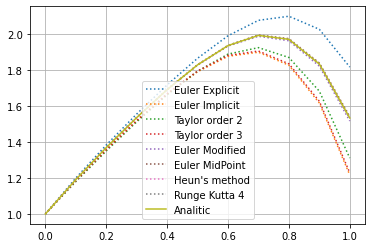

In [3]:
npts = 11
ts = np.linspace(0, 1, npts)
y0, h = 1, ts[1]-ts[0]
f = lambda t, y: 2 - 2*t+4*t**2 - 4*t**3 - 4*t**4
f_ = lambda t, y: -2+8*t-12*t**2-16*t**3
f__ = lambda t, y: 8-24*t-48*t**2
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_eulimp = y0*np.ones(len(ts), dtype="float64")
for i in range(npts-1):
    w_eulimp[i+1] = w_eulimp[i] + h * f(ts[i+1], 0)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, 2)
w_heun, _ = rungekuttamethod(f, y0, ts, 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, 4)
yanalitic = 1 + 2*ts - ts**2 + (4/3)*ts**3 - ts**4 - (4/5)*ts**5
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_eulimp, ls="dotted", label="Euler Implicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 2

> $$y' = 1+\dfrac{1}{t}y$$
> $$1 \le t \le 2 \ \ \ \ \ \ y(1)=2$$
> 
> Solução analítica
>
> $$y(t) = t\cdot \ln t +2t$$

Para o implicito, temos

$$
w_{i+1} = w_{i} + h \cdot \left(1 + \dfrac{1}{t_{i+1}}\cdot w_{i+1}\right)
$$
$$
\left(1 - \dfrac{h}{t_{i+1}}\right) w_{i+1} = w_{i} + h
$$
$$
w_{i+1} = \dfrac{t_{i+1}}{t_{i}} \left( w_{i} + h \right)
$$

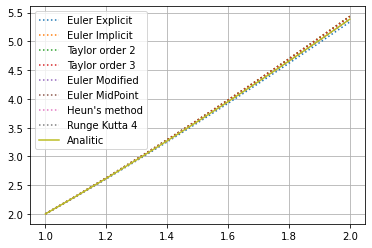

In [4]:
npts = 11
ts = np.linspace(1, 2, npts)
y0, h = 2, ts[1]-ts[0]
f = lambda t, y: 1 + y/t
f_ = lambda t, y: 1/t
f__ = lambda t, y: -1/t**2
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_eulimp = y0*np.ones(len(ts), dtype="float64")
for i in range(npts-1):
    w_eulimp[i+1] = (ts[i+1]/ts[i]) * (w_eulimp[i] + h)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, 2)
w_heun, _ = rungekuttamethod(f, y0, ts, 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, 4)
yanalitic = ts * np.log(ts) + 2*ts
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_eulimp, ls="dotted", label="Euler Implicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 3

> $$y' = t^2\cdot y$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \exp \left(\dfrac{t^3}{3}\right)$$

Para o esquema implicito, temos

$$
w_{i+1} = w_{i} + h \cdot f(t_{i+1}, \ w_{i+1})
$$
$$
w_{i+1} = w_{i} + h \cdot t_{i+1}^2 \cdot  w_{i+1}
$$
$$
w_{i+1} = \dfrac{1}{1-ht_{i+1}^2} \cdot w_{i}
$$

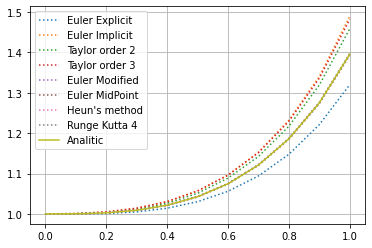

In [5]:
npts = 11
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: y * t**2
f_ = lambda t, y: y * (2*t + t**4)
f__ = lambda t, y: y * (2 + 6*t**3+t**6)
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_eulimp = y0*np.ones(len(ts), dtype="float64")
for i in range(npts-1):
    w_eulimp[i+1] = w_eulimp[i]/(1-h*ts[i+1]**2)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, 2)
w_heun, _ = rungekuttamethod(f, y0, ts, 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, 4)
yanalitic = np.exp(ts**3/3)
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_eulimp, ls="dotted", label="Euler Implicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 4

> $$y' = t \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \dfrac{2}{2-t^2}$$

Para o esquema implicito, temos

$$
w_{i+1} = w_{i} + h \cdot f(t_{i+1}, \ w_{i+1})
$$
$$
w_{i+1} = w_{i} + h \cdot t_{i+1} \cdot  w_{i+1}^2
$$
$$
w_{i+1}^2 - \dfrac{1}{ht_{i+1}} \cdot w_{i+1} = -\dfrac{1}{ht_{i+1}} \cdot w_{i}
$$
$$
w_{i+1}^2 - \dfrac{1}{ht_{i+1}} \cdot w_{i+1} = -\dfrac{1}{ht_{i+1}} \cdot w_{i}
$$

$$
w_{i+1}^2 - \dfrac{1}{ht_{i+1}} \cdot w_{i+1} + \dfrac{1}{4h^2t_{i+1}^2}= -\dfrac{1}{ht_{i+1}} \cdot w_{i}+ \dfrac{1}{4h^2t_{i+1}^2}
$$

$$
w_{i+1} = \dfrac{1}{2ht_{i+1}}\left( 1\pm \sqrt{1 -4ht_{i+1} \cdot w_{i}}\right)
$$

Pegamos o ramo negativo:

$$
w_{i+1} = \dfrac{1}{2ht_{i+1}}\left( 1 - \sqrt{1 -4ht_{i+1} \cdot w_{i}}\right)
$$

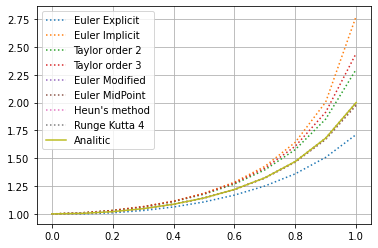

In [6]:
npts = 11
ts = np.linspace(0, 1, npts)
y0, h = 1, ts[1]-ts[0]
f = lambda t, y: t*y**2
f_ = lambda t, y: y**2 * (1 + 2*y*t**2)
f__ = lambda t, y: 6*t*y**3 * (1+y*t**2)
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_eulimp = y0*np.ones(len(ts), dtype="float64")
for i in range(npts-1):
    w_eulimp[i+1] = (1-np.sqrt(1-4*h*ts[i+1] * w_eulimp[i]))/(2*h*ts[i+1])
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, 2)
w_heun, _ = rungekuttamethod(f, y0, ts, 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, 4)
yanalitic = 2/(2-ts**2)
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_eulimp, ls="dotted", label="Euler Implicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 5

> $$y' = 1 + \dfrac{1}{2} \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=0.5$$
> 
> Solução analítica
>
> $$y(t) = \sqrt{2} \cdot \tan \left(\dfrac{t}{\sqrt{2}}+\arctan \left(\dfrac{1}{2\sqrt{2}}\right)\right)$$

Para o esquema implicito, temos

$$
w_{i+1} = w_{i} + h \cdot f(t_{i+1}, \ w_{i+1})
$$
$$
w_{i+1} = w_{i} + h \cdot \left(1+\dfrac{1}{2}w_{i+1}^2 \right)
$$
$$
w_{i+1}^2  - \dfrac{2}{h} \cdot w_{i+1} + \dfrac{2}{h} w_{i} = 0
$$
$$
w_{i+1} = \dfrac{1 \pm \sqrt{1 - 2hw_i}}{h}
$$
$$
w_{i+1} = \dfrac{1}{h}\left(1 \pm \sqrt{1 - 2hw_i}\right)
$$

Pegando o ramo negativo

$$
w_{i+1} = \dfrac{1}{h}\left(1-\sqrt{1-2hw_i}\right)
$$

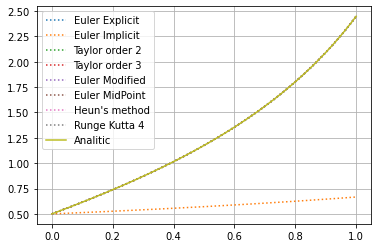

In [7]:
npts = 1029
ts = np.linspace(0, 1, npts)
y0, h = 0.5, ts[1]-ts[0]
f = lambda t, y: 1 + (y**2)/2
f_ = lambda t, y: y**2
f__ = lambda t, y: 0
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_eulimp = y0*np.ones(len(ts), dtype="float64")
for i in range(npts-1):
    w_eulimp[i+1] = (1-np.sqrt(1-2*h*w_eulimp[i]))/h
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, 2)
w_heun, _ = rungekuttamethod(f, y0, ts, 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, 4)
yanalitic = np.sqrt(2) * np.tan(ts/np.sqrt(2) + np.arctan(2**(-3/2)))
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_eulimp, ls="dotted", label="Euler Implicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 6

> Considere novamente a equação 
> 
> $$y=2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0) = 1$$
> 
> Para um tempo fixo $t = 1$, faça um estudo do erro (módulo da diferença entre o valor $y$ calculado
e o valor exato) em função do valor do $\Delta t$ utilizado.
> Compare os resultados obtidos com os 4 métodos. Disserte.

In [8]:
ndivs = 129
manynpts = list(set(np.array(10**np.linspace(0.5, 4, ndivs), dtype="int32")))
manynpts.sort()
print("Numero de pontos: ")
print(manynpts)
y0 = 1.0  # Condicao inicial
yan = 23/15  # Valor final, da resposta analitica
f = lambda t, y: 2 - 2*t+4*t**2 - 4*t**3 - 4*t**4
f_ = lambda t, y: -2+8*t-12*t**2-16*t**3
f__ = lambda t, y: 8-24*t-48*t**2
methods = ["Euler Explicit", "Euler Implicit", "Taylor order 2", "Taylor order 3", "Euler Modified",
           "Euler MidPoint", "Heun's method", "Runge Kutta 4"]
vectors = {}
for meth in methods:
    vectors[meth] = np.zeros(len(manynpts), dtype="object")
for i, npts in enumerate(manynpts):
    ts = np.linspace(0, 1, npts)
    
    vectors["Euler Explicit"][i] = eulerexplicit(f, y0, ts)[0][-1] - yan
    vectors["Taylor order 2"][i] = taylormethod([f, f_], y0, ts)[0][-1] - yan
    vectors["Taylor order 3"][i] = taylormethod([f, f_, f__], y0, ts)[0][-1] - yan
    vectors["Euler Modified"][i] = rungekuttamethod(f, y0, ts, 1)[0][-1] - yan
    vectors["Euler MidPoint"][i] = rungekuttamethod(f, y0, ts, 2)[0][-1] - yan
    vectors["Heun's method"][i] = rungekuttamethod(f, y0, ts, 3)[0][-1] - yan
    vectors["Runge Kutta 4"][i] = rungekuttamethod(f, y0, ts, 4)[0][-1] - yan
    w_eulimp = y0*np.ones(len(ts), dtype="float64")
    for kk in range(npts-1):
        w_eulimp[kk+1] = w_eulimp[kk] + h * f(ts[kk+1], 0)
    vectors["Euler Implicit"][i] = w_eulimp[-1] - yan

Numero de pontos: 
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 28, 30, 32, 34, 36, 39, 41, 44, 47, 50, 53, 57, 60, 64, 69, 73, 78, 83, 88, 94, 100, 107, 114, 121, 129, 138, 147, 156, 166, 177, 189, 201, 214, 228, 243, 259, 276, 294, 313, 333, 355, 378, 403, 429, 457, 486, 518, 552, 588, 626, 667, 710, 756, 805, 858, 913, 973, 1036, 1103, 1175, 1252, 1333, 1420, 1512, 1610, 1715, 1826, 1945, 2072, 2206, 2350, 2502, 2665, 2838, 3023, 3219, 3428, 3651, 3889, 4141, 4410, 4697, 5002, 5327, 5674, 6042, 6435, 6853, 7299, 7773, 8278, 8816, 9389, 10000]


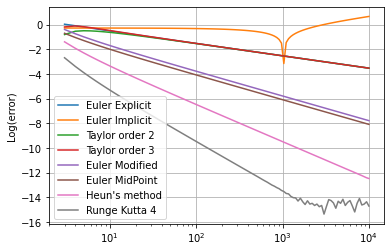

In [9]:
for meth in methods:
    vector = [mpmath.log10(mpmath.fabs(vi)) for vi in vectors[meth]]
    plt.plot(manynpts, vector, label=meth)
plt.legend()
plt.grid()
plt.xscale("log")
# plt.yscale("log")
plt.ylabel("Log(error)")
plt.show()

### Exercicio 7

> O deslocamento angular $\theta(t)$, em radianos, de um pêndulo é dado por 
> 
> $$\dfrac{d^2\theta}{dt^2}+\dfrac{g}{L}\ \sin \theta = 0$$
>
> com
>
> * $\theta(0) = \theta_0$
> * $\theta'(0) = \theta_0'$
> * $g = 9.81\ \text{m}/\text{s}^2$, a aceleração gravitacional
> * $L$ o comprimento do pêndulo.
> 
> Para pequenos valores de $\theta$, essa equação pode ser simplificada para
> 
> $$\dfrac{d^2\theta}{dt^2} + \dfrac{g}{L}\cdot \theta = 0$$
> 
> Faça gráficos de $\theta$ em função de $t$, com um período de oscilação, para $\theta(0) = 0.1$ e $\theta(0) = 0.5$, $\theta'(0)=0$ e $L = 0.1$, $1.0$ e $10$ m.
> Utilize a equação exata e a simplificada. Compare os resultados

$$y' = \begin{bmatrix}\theta' \\ \theta''\end{bmatrix} = \begin{bmatrix}\theta' \\ -\dfrac{g}{L} \cdot \theta\end{bmatrix} = f(t, y)$$

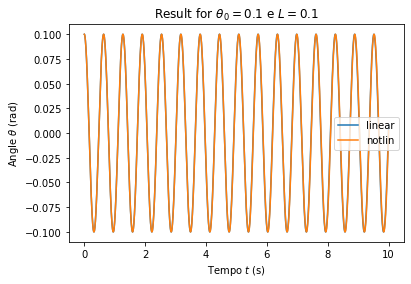

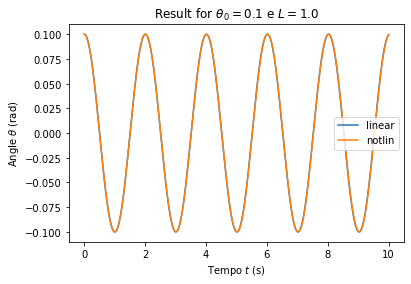

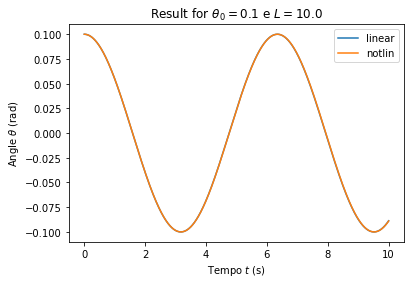

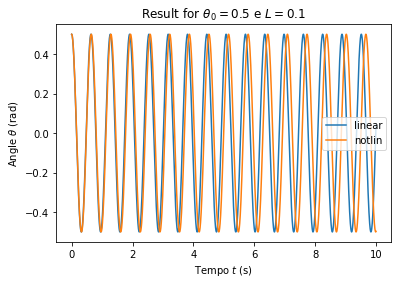

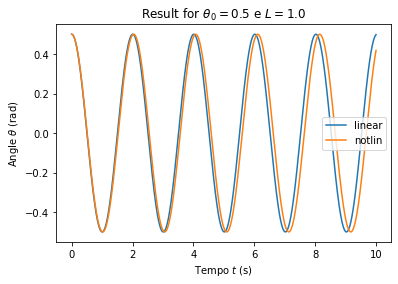

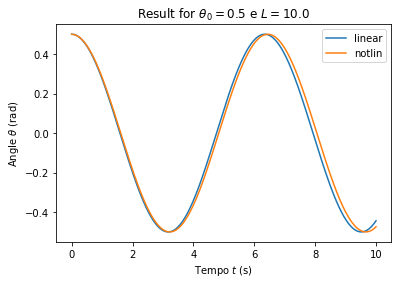

In [10]:
g = 9.81
dth0 = 0
colors = ["blue", "red", "orange"]
ts = np.linspace(0, 10, 2**13+1, dtype="object")
for i, th0 in enumerate([0.1, 0.5]):
    for j, L in enumerate([0.1, 1.0, 10]):
        plt.figure()
        y0 = [th0, dth0]
        flin = lambda t, y: np.array([y[1], -g*y[0]/L], dtype="object")
        fsin = lambda t, y: np.array([y[1], -g*np.sin(y[0])/L], dtype="object")
        wlin, _ = rungekuttamethod(flin, y0, ts)
        wsin, _ = rungekuttamethod(fsin, y0, ts)
        plt.plot(ts, wlin[:, 0], label="linear")
        plt.plot(ts, wsin[:, 0], label="notlin")
        plt.xlabel(r"Tempo $t$ (s)")
        plt.ylabel(r"Angle $\theta$ (rad)")
        plt.title(r"Result for $\theta_0=%.1f$ e $L=%.1f$" % (th0, L))
        plt.legend()
plt.show()

### Exercicio 8

> Em um circuito com tensão aplicada $\epsilon(t)$ e com resistência $R$, indutância $L$ e capacitância $C$ em paralelo, a corrente $i$ satisfaz a equação diferencial
> 
> $$\dfrac{di}{dt}=C\cdot \dfrac{d^2\epsilon}{dt^2}+\dfrac{1}{R}\cdot \dfrac{d\epsilon}{dt}+\dfrac{1}{L}\cdot \epsilon$$
>
> Suponha que $C = 0.3$ *farads*, $R = 1.4$ *ohm*, $L = 1.7$ *henrie* e que a tensão seja dada, em *Volts*,
por
>
> $$\epsilon(t) = \exp\left(-0.06\pi t\right)\cdot \sin \left(2t-\pi\right)$$
>
> Se $i(0) = 0$, encontre a corrente para $t$ entre $0$ e $10$ s.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

Como essa EDO é simples de se resolver, mas primeiro reescrevemos

$$
\epsilon = - \exp\left(-\xi t\right) \cdot \sin \left(\omega t\right)
$$
$$
\dfrac{d\epsilon}{dt} = \exp \left(-\xi t\right) \left[ \xi \sin \left(\omega t\right) - \omega \cos \left(\omega t\right)\right]
$$
$$
\int \epsilon \ dt = \dfrac{\xi \cdot \sin \left(\omega t\right) + \omega \cdot \cos \left(\omega t\right)}{\omega^2+\xi^2}
$$
$$
i = C \cdot \dfrac{d\epsilon}{dt} + \dfrac{1}{R} \cdot \epsilon + \dfrac{1}{L} \int \epsilon \ dt
$$

Logo 

$$
\boxed{i(t) = i_{sin}(t) + i_{cos}(t) + \text{const}}
$$
$$
i_{sin}(t) = \left(\xi C - \dfrac{1}{R} + \dfrac{1}{L} \cdot \dfrac{\xi}{\xi^2+\omega^2}\right) \cdot \exp\left(-\xi t\right) \cdot \sin \left(\omega t\right)
$$
$$
i_{cos}(t) = \left(-\omega C + \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right) \cdot \exp\left(-\xi t\right) \cdot \cos \left(\omega t\right)
$$

No tempo $t=0$ temos a condição inicial de que $i_0 = 0$ então teremos a constante de

$$
i(0) = i_{sin}(0) + i_{cos}(0) + \text{const} = \left(-\omega C + \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right) + \text{const}
$$
$$
\text{const} = \omega C - \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}
$$
$$
\boxed{i(t) = i_{sin}(t) + i_{cos}(t) + \left(\omega C - \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right)}
$$

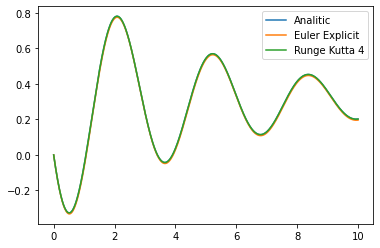

In [11]:
C, R, L = 0.3, 1.4, 1.7
xi = 0.06*np.pi
wn = 2
t, i = sp.symbols("t i", real=True)
eps = -sp.exp(-xi*t) * sp.sin(wn*t)
eps_ = sp.diff(eps, t)
eps__ = sp.diff(eps_, t)
fsymb = C * eps__ + eps_/R + eps/L
f = sp.lambdify((t, i), fsymb)
ts = np.linspace(0, 10, 1049)
i0 = 0
w_eulexp, _ = eulerexplicit(f, i0, ts)
w_runkt4, _ = rungekuttamethod(f, i0, ts)
const = (wn*C - wn/(L*(xi**2+wn**2)))
isin = (xi*C - 1/R + xi/(L*(xi**2+wn**2)))*np.exp(-xi*ts)*np.sin(wn*ts)
icos = const*(1-np.exp(-xi*ts)*np.cos(wn*ts))
i_analitic = isin + icos
plt.plot(ts, i_analitic, label="Analitic")
plt.plot(ts, w_eulexp, label="Euler Explicit")
plt.plot(ts, w_runkt4, label="Runge Kutta 4")
plt.legend()

### Exercicio 9

> O crescimento populacional de uma dada espécie pode ser modelado por uma EDO do tipo
> 
> $$\dfrac{dN}{dt} = aN - bN^2$$
> 
> em que
>
> * $N(0) = N_0$
> * $N$ é a população
> * $aN$ representa a taxa de nascimento
> * $bN^2$ representa a taxa de mortalidade causada por doenças e competição por alimentos.
> 
> Se
>  
> * $N_0 = 100000$
> * $a = 0.1$
> * $b = 10^{−7}$
> 
> calcule $N(t)$ para $t$ entre $0$ e $20$ anos.
> 
> Varie o coeficiente $b$ e veja como isso afeta no número de indivíduos.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

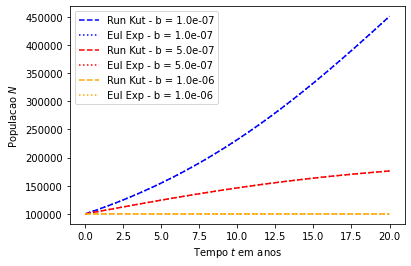

In [12]:
N0 = 1e+5
a = 0.1
colors = ["blue", "red", "orange"]
for i, b in enumerate([1e-7, 5e-7, 1e-6]):
    f = lambda t, N: a*N - b*N**2
    ts = np.linspace(0, 20, 1029)
    w_eulexp, _ = eulerexplicit(f, N0, ts)
    w_runkt4, _ = rungekuttamethod(f, N0, ts, 4)
    plt.plot(ts, w_runkt4, ls="dashed", color=colors[i], label="Run Kut - b = %.1e" % b)
    plt.plot(ts, w_eulexp, ls="dotted", color=colors[i], label="Eul Exp - b = %.1e" % b)
    plt.xlabel(r"Tempo $t$ em anos")
    plt.ylabel(r"Populacao $N$")
plt.legend()

### Exercicio 10

> As populações de duas espécies competindo pela mesma fonte de alimentação podem ser modeladas pelo par de EDOS
> 
> $$\dfrac{dN_1}{dt} = N_1\left(a_1 - b_1 N_1 - c_1 N_2\right)$$
> $$\dfrac{dN_2}{dt} = N_2\left(a_2 - b_2 N_2 - c_2 N_1\right)$$
> 
> Com
> 
> * $N_1(t=0) = N_{1,0}$
> * $N_2(t=0) = N_{2,0}$
> 
> Nessas equações
> 
> * $N_i$ é o número de indivíduos da espécie $i$
> * $a_iN_i$ representa a taxa de nascimento
> * $b_iN_i^2$ representa a taxa de mortalidade
> * $c_iN_iN_j$ representa a taxa de mortalidade devido à competição por alimentos.
> 
> Se
> 
> * $N_{1,0} = N_{2,0} = 10^5$
> * $a_1 = 0.1$, $b_1 = 8 \cdot 10^{-7}$ e $c_1 = 10^{−6}$
> * $a_2 = 0.1$, $b_2 = 8 \cdot 10^{−7}$ e $c_2 = 10^{−7}$
> 
> calcule $N_{1}(t)$ e $N_{2}(t)$ entre $0$ e $10$ anos

Podemos reescrever o sistema em formulação matricial

$$
y = \begin{bmatrix} N_1 \\ N_2 \end{bmatrix} \Rightarrow y' = \begin{bmatrix} \frac{dN_1}{dt} \\ \frac{dN_2}{dt}\end{bmatrix}
$$
$$
y' = f(t, y) = \begin{bmatrix} a_1 N_1 -b_1N_1^2 -c_1 N_1N_2 \\ a_2 N_2 -b_2 N_2^2 - c_2 N_1N_2\end{bmatrix} 
$$

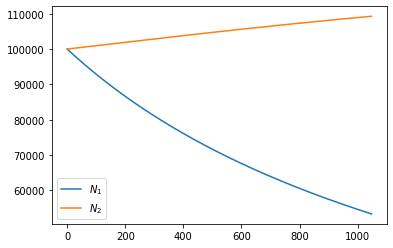

In [13]:
def f(t, y):
    f1 = a1 * y[0] - b1 * y[0]**2 - c1 * y[0] * y[1]
    f2 = a2 * y[1] - b2 * y[1]**2 - c2 * y[0] * y[1]
    return np.array([f1, f2], dtype="object")

a1, a2 = 0.1, 0.1
b1, b2 = 8e-7, 8e-7
c1, c2 = 1e-6, 1e-7
N10 = N20 = 1e+5

y0 = np.array([N10, N20], dtype="object")
ts = np.linspace(0, 10, 1049)
w_runkt4, _ = rungekuttamethod(f, y0, ts)
plt.plot(w_runkt4[:, 0], label=r"$N_{1}$")
plt.plot(w_runkt4[:, 1], label=r"$N_{2}$")
plt.legend()